# Proyek Analisis Data: Bike Sharing Dataset (Sumber)
- **Nama:** Agum Medisa
- **Email:** a184ybm526@devacademy.id
- **ID Dicoding:** agummedisa

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Pada jam berapa dan hari apa permintaan sepeda paling tinggi dan rendah?
- Bagaimana tren penyewaan sepeda berdasarkan musim?
- Bagaimana pengaruh hari libur dan akhir pekan terhadap penyewaan sepeda?
- Seberapa besar dampak perubahan suhu terhadap penyewaan sepeda?
- Apakah ada jam sibuk dalam penyewaan sepeda?
- Bagaimana pengaruh cuaca ekstrem terhadap penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Terdapat variasi dalam kondisi cuaca (kolom weathersit), yang bisa digunakan untuk menganalisis pengaruh cuaca terhadap penggunaan sepeda.
- Kolom temp dan windspeed bisa digunakan untuk memahami pengaruh suhu dan kecepatan angin terhadap aktivitas bersepeda.
- Kolom holiday dan workingday memberi gambaran tentang pengaruh hari libur dan hari kerja terhadap jumlah penggunaan sepeda.


In [5]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Penggunaan Sepeda Berfluktuasi Sepanjang Hari:
- Dari beberapa data awal, jumlah cnt berubah setiap jam, dengan variasi pengguna casual dan registered.
- Tren Pengguna Casual vs Registered:
- Di jam-jam awal (misalnya pukul 1-4 pagi), jumlah pengguna registered lebih tinggi dibanding casual.
- Ini menunjukkan bahwa pengguna terdaftar mungkin lebih konsisten dalam penggunaan sepeda, sedangkan pengguna casual cenderung lebih sedikit di malam/malam hari.

### Assessing Data

In [6]:
# Menilai data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Tidak ada masalah dalam data ```day_df``` ini, jumlah semua data sama

In [7]:
# Menilai Data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Sama halnya dengan ```day_df```, data pada ```hour_df``` juga tidak ada masalah di dalamnya

In [8]:
# Melihat jumlah duplikasi data day_df
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())
# Melihat jumlah duplikasi data pada hour_df
print("Jumlah duplikasi hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi day_df:  0
Jumlah duplikasi hour_df:  0


In [9]:
# Memeriksa parameter statistik dari kolom numerik day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
# Memeriksa parameter statistik dari kolom numerik hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada proses Assesing Data, dapat dilihat tidak ada yang salah dari data-data yang telah ada. Sehingga tidak perlu lagi untuk masuk ke tahap Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [11]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


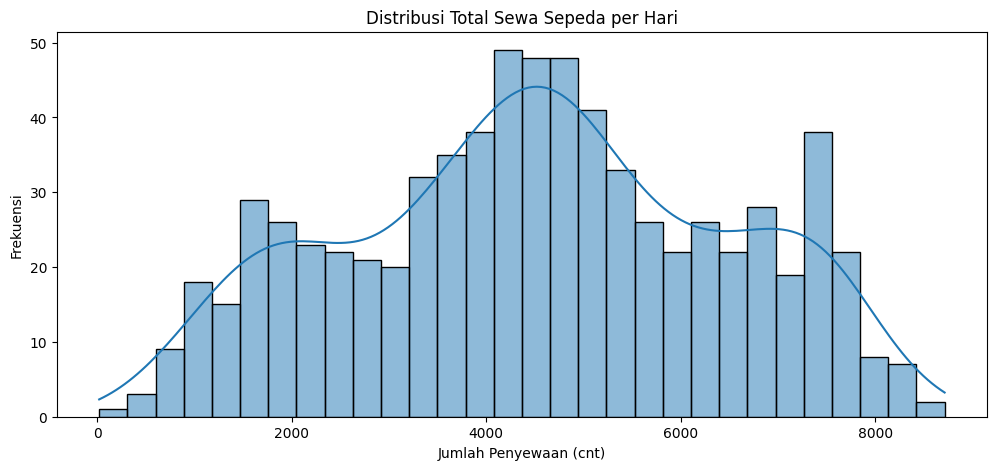

In [12]:
# EDA Univariate (Distribusi data untuk variabel numerik)
plt.figure(figsize=(12, 5))
sns.histplot(day_df["cnt"], bins=30, kde=True)
plt.title("Distribusi Total Sewa Sepeda per Hari")
plt.xlabel("Jumlah Penyewaan (cnt)")
plt.ylabel("Frekuensi")
plt.show()


**Insight:**
- Dataset mencakup 731 hari, yang berarti data mencakup sekitar 2 tahun
- Rata-rata harian: 4504 sepeda digunakan per hari
- Minimum: 22 sepeda dalam satu hari
- Maksimum: 8714 sepeda dalam satu hari

### Explore Data hour_df

In [13]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


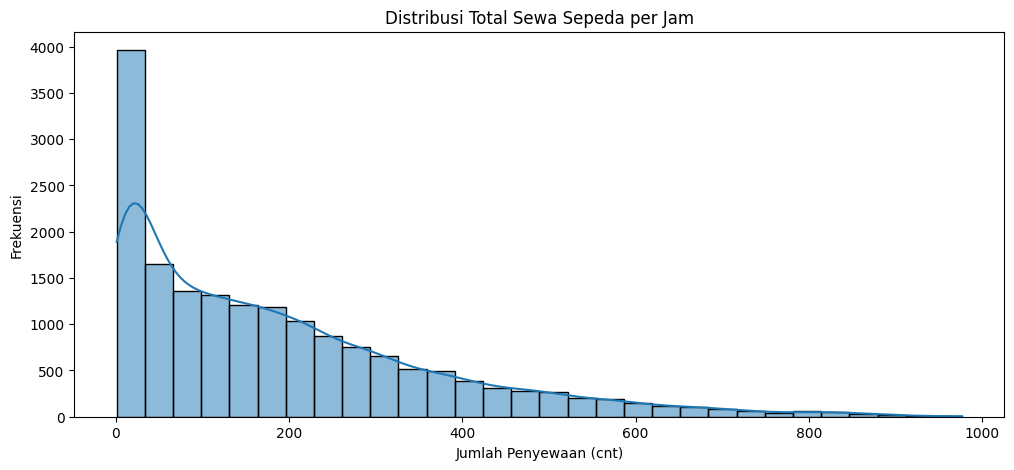

In [43]:
# EDA Univariate (Distribusi data untuk variabel numerik)
plt.figure(figsize=(12, 5))
sns.histplot(hour_df["cnt"], bins=30, kde=True)
plt.title("Distribusi Total Sewa Sepeda per Jam")
plt.xlabel("Jumlah Penyewaan (cnt)")
plt.ylabel("Frekuensi")
plt.show()

C:\Users\Agum Medisa\AppData\Local\Temp\ipykernel_8152\304847368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hour_df, x="hr", palette="Set2")


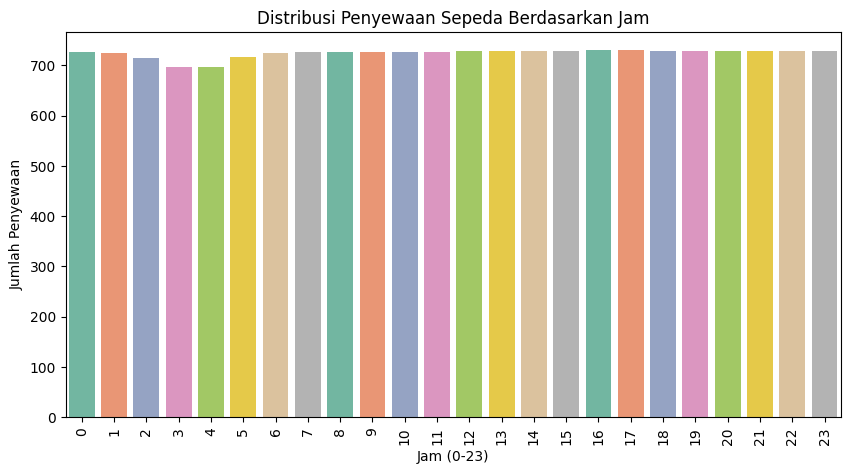

In [ ]:
# EDA Kategorikal (Distribusi variabel kategori)
plt.figure(figsize=(10, 5))
sns.countplot(data=hour_df, x="hr", palette="Set2")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam (0-23)")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=90)
plt.show()

**Insight:**
- Rata-rata: 189 sepeda per jam
- Casual (35.7 pengguna/jam) jauh lebih sedikit dibanding Registered (153.8 pengguna/jam)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

In [47]:
# Hitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca
avg_rent_weather = day_df.groupby("weathersit")["cnt"].mean().reset_index()
avg_rent_weather.columns = ["Kondisi Cuaca", "Rata-rata Penyewaan"]

# Hitung total penyewaan sepeda berdasarkan kondisi cuaca
total_rent_weather = day_df.groupby("weathersit")["cnt"].sum().reset_index()
total_rent_weather.columns = ["Kondisi Cuaca", "Total Penyewaan"]

# Ubah kode kondisi cuaca menjadi lebih deskriptif
weather_mapping = {1: "Cerah", 2: "Berkabut", 3: "Hujan/Salju Ringan"}
avg_rent_weather["Kondisi Cuaca"] = avg_rent_weather["Kondisi Cuaca"].map(weather_mapping)
total_rent_weather["Kondisi Cuaca"] = total_rent_weather["Kondisi Cuaca"].map(weather_mapping)

# Tampilkan tabel
print("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
print(avg_rent_weather.to_string(index=False))

print("\n Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
print(total_rent_weather.to_string(index=False))

Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca
     Kondisi Cuaca  Rata-rata Penyewaan
             Cerah          4876.786177
          Berkabut          4035.862348
Hujan/Salju Ringan          1803.285714

 Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca
     Kondisi Cuaca  Total Penyewaan
             Cerah          2257952
          Berkabut           996858
Hujan/Salju Ringan            37869


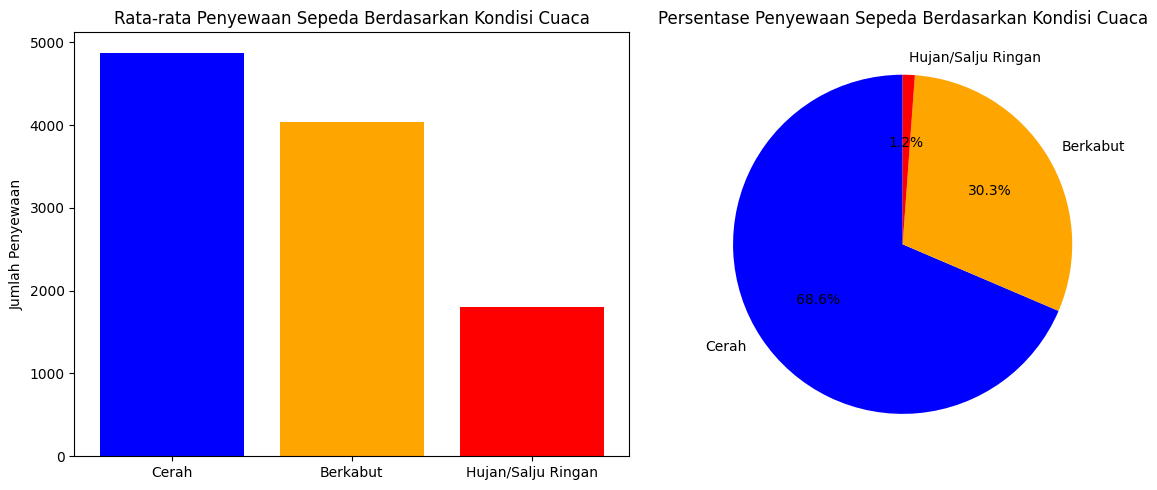

In [45]:
# Hitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca
avg_rent_weather = day_df.groupby("weathersit")["cnt"].mean()

# Buat visualisasi
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Menampilkan Bar Chart - Rata-rata penyewaan berdasarkan kondisi cuaca
weather_labels = ["Cerah", "Berkabut", "Hujan/Salju Ringan"]
axes[0].bar(weather_labels, avg_rent_weather, color=["blue", "orange", "red"])
axes[0].set_title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
axes[0].set_ylabel("Jumlah Penyewaan")

# Menampilkan Distribusi total penyewaan berdasarkan kondisi cuaca
total_rent_weather = day_df.groupby("weathersit")["cnt"].sum()
axes[1].pie(total_rent_weather, labels=weather_labels, autopct="%1.1f%%", colors=["blue", "orange", "red"], startangle=90)
axes[1].set_title("Persentase Penyewaan Sepeda Berdasarkan Kondisi Cuaca")

plt.tight_layout()
plt.show()

**Insight:**
- Cuaca cerah memiliki jumlah penyewaan tertinggi (sekitar 5000 penyewaan)
- 68.6% dari total penyewaan terjadi saat cuaca cerah, menjadikannya kondisi paling dominan
- Hal ini menunjukkan bahwa pengguna sangat menghindari hujan atau salju saat menggunakan sepeda

### Pertanyaan 2: Pada jam berapa dan hari apa permintaan sepeda paling tinggi dan rendah?


In [18]:
# Pola Penyewaan Sepeda Berdasarkan Jam
hourly_rentals = hour_df.groupby("hr")["cnt"].mean().reset_index()
print(hourly_rentals)

    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


In [19]:
# Pola Penyewaan Sepeda Berdasarkan Hari
daily_rentals = hour_df.groupby("weekday")["cnt"].mean().reset_index()
daily_rentals["weekday"] = daily_rentals["weekday"].replace({
    0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu",
    4: "Kamis", 5: "Jumat", 6: "Sabtu"
})
print(daily_rentals)

  weekday         cnt
0  Minggu  177.468825
1   Senin  183.744655
2  Selasa  191.238891
3    Rabu  191.130505
4   Kamis  196.436665
5   Jumat  196.135907
6   Sabtu  190.209793


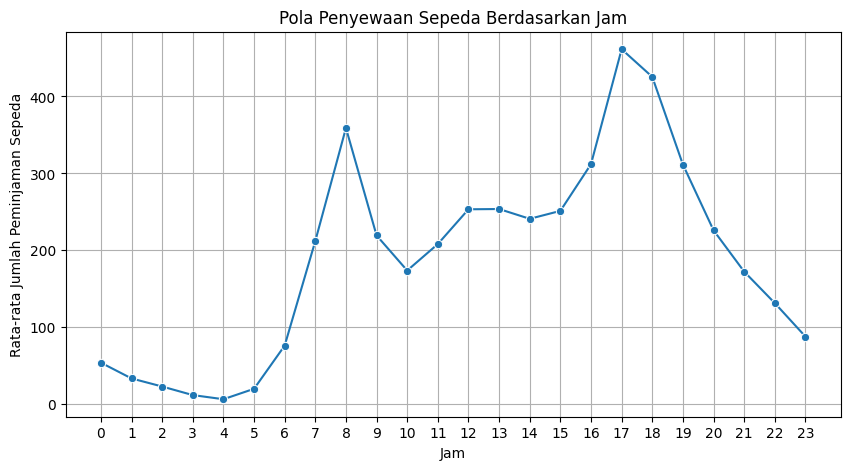

In [20]:
# Agregasi rata-rata penyewaan berdasarkan jam
hourly_rentals = hour_df.groupby("hr")["cnt"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker="o")
plt.xticks(range(0, 24))
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda")
plt.title("Pola Penyewaan Sepeda Berdasarkan Jam")
plt.grid()
plt.show()

**Insight:**
- Puncak Penyewaan Sepeda (Rush Hour) yaitu  Pagi hari (07:00 - 09:00) dan Sore hari (16:00 - 18:00)
- Jam Rendah Aktivitas terjadi pada Dini hari (00:00 - 05:00) dan Siang hari (9:00 - 15:00)
- Setelah puncak pagi (sekitar 08:00), terjadi penurunan penyewaan hingga sekitar pukul 10:00

C:\Users\Agum Medisa\AppData\Local\Temp\ipykernel_8152\290307456.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_rentals.index, y=daily_rentals.values, palette="Blues")


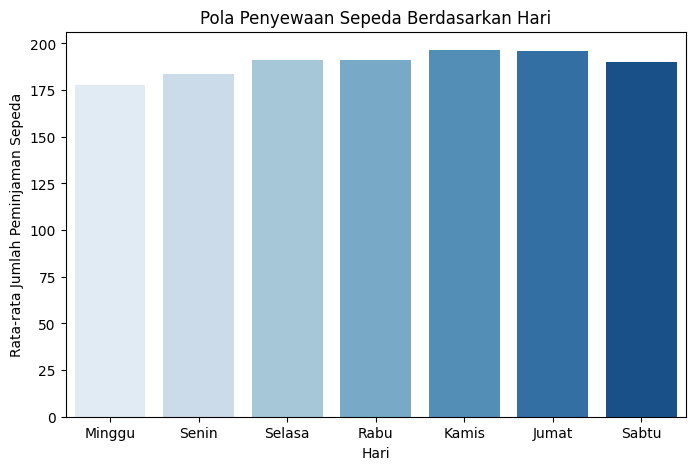

In [21]:
# Agregasi rata-rata penyewaan berdasarkan hari
daily_rentals = hour_df.groupby("weekday")["cnt"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=daily_rentals.index, y=daily_rentals.values, palette="Blues")
plt.xticks(ticks=range(7), labels=["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"])
plt.xlabel("Hari")
plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda")
plt.title("Pola Penyewaan Sepeda Berdasarkan Hari")
plt.show()

**Insight:**
- Penyewaan sepeda cenderung meningkat dari hari Minggu ke hari kerja, dengan puncaknya terjadi pada hari Jumat dan Sabtu
- Minggu memiliki jumlah penyewaan yang paling rendah, diikuti oleh Senin, yang sedikit lebih tinggi
- Hari kerja (Senin–Jumat) memiliki jumlah penyewaan yang tinggi, kemungkinan besar karena penggunaan sepeda untuk transportasi kerja atau sekolah


### Pertanyaan 3: Bagaimana tren penyewaan sepeda berdasarkan musim?

In [22]:
# Tren Penyewaan Sepeda Berdasarkan Musim
season_trend = day_df.groupby("season")["cnt"].sum().reset_index()
season_trend["season"] = season_trend["season"].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
print(season_trend)

   season      cnt
0  Spring   471348
1  Summer   918589
2    Fall  1061129
3  Winter   841613


C:\Users\Agum Medisa\AppData\Local\Temp\ipykernel_8152\2935148310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=day_df, palette="coolwarm")


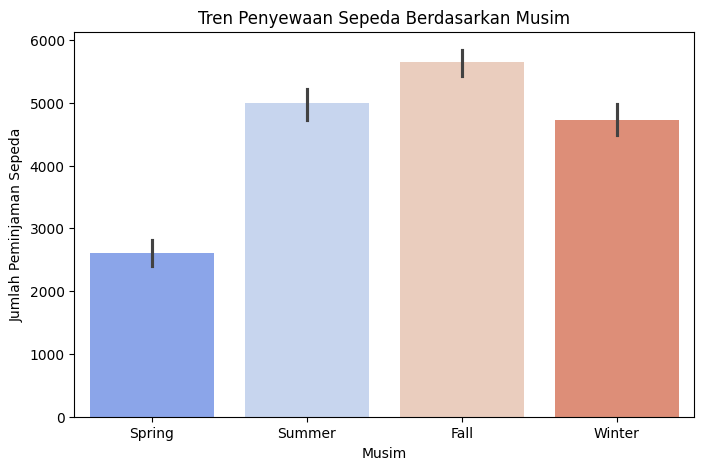

In [23]:
# Tren penyewaan sepeda berdasarkan musim?
plt.figure(figsize=(8, 5))
sns.barplot(x="season", y="cnt", data=day_df, palette="coolwarm")
plt.xticks([0, 1, 2, 3], ["Spring", "Summer", "Fall", "Winter"])
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Tren Penyewaan Sepeda Berdasarkan Musim")
plt.show()

**Insight**
- Musim dengan Penyewaan Tertinggi terjadi pada Musim Gugur (Fall) dan Musim Panas (Summer)
- Musim dengan Penyewaan Terendah terjadi pada Musim Semi (Spring) dan Musim Dingin (Winter)
- Tren menunjukkan bahwa penyewaan sepeda cenderung lebih tinggi di musim panas dan gugur

### Pertanyaan 4: Pengaruh Hari Libur dan Akhir Pekan terhadap Penyewaan Sepeda

In [24]:
holiday_workingday = day_df.groupby(["holiday", "workingday"])["cnt"].mean().reset_index()
print(holiday_workingday)

   holiday  workingday          cnt
0        0           0  4389.685714
1        0           1  4584.820000
2        1           0  3735.000000


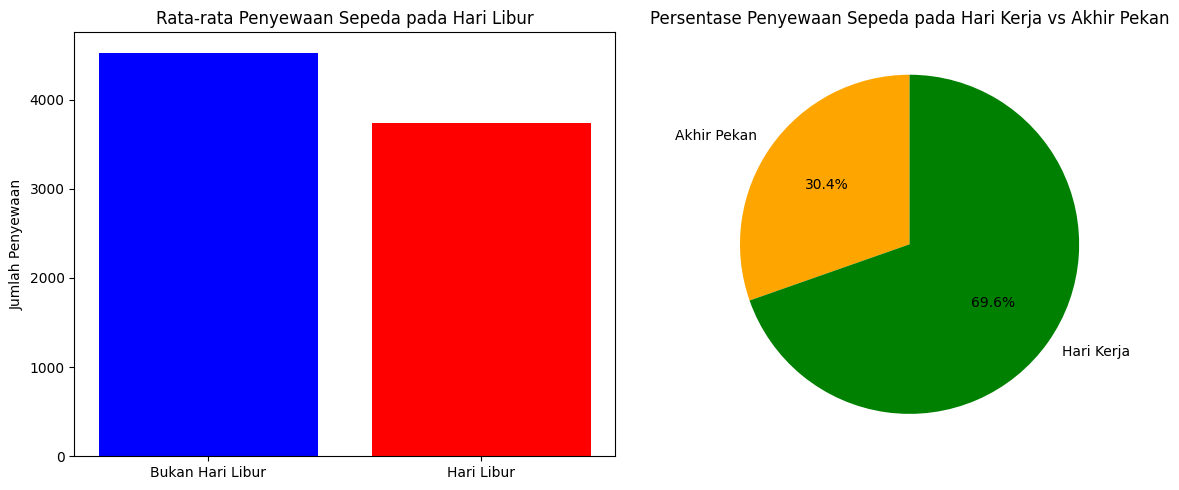

In [44]:
# Pengaruh hari libur dan akhir pekan terhadap penyewaan sepeda
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Menampilkan Bar Chart - Rata-rata penyewaan sepeda pada hari libur vs bukan
avg_rent_holiday = day_df.groupby("holiday")["cnt"].mean()
axes[0].bar(["Bukan Hari Libur", "Hari Libur"], avg_rent_holiday, color=["blue", "red"])
axes[0].set_title("Rata-rata Penyewaan Sepeda pada Hari Libur")
axes[0].set_ylabel("Jumlah Penyewaan")

# Menampilkan Pie Chart - Distribusi penyewaan sepeda pada hari kerja vs akhir pekan
total_rent_workingday = day_df.groupby("workingday")["cnt"].sum()
labels = ["Akhir Pekan", "Hari Kerja"]
colors = ["orange", "green"]
axes[1].pie(total_rent_workingday, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90)
axes[1].set_title("Persentase Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan")

plt.tight_layout()
plt.show()

**Insight:**
- Penyewaan Lebih Tinggi pada Hari Kerja
- Hari Kerja → Penyewaan Tinggi
- Akhir Pekan → Penyewaan Lebih Rendah

### Pertanyaan 5: Dampak Perubahan Suhu terhadap Penyewaan Sepeda

In [26]:
correlation = day_df[["temp", "cnt"]].corr()
print(correlation)

          temp       cnt
temp  1.000000  0.627494
cnt   0.627494  1.000000


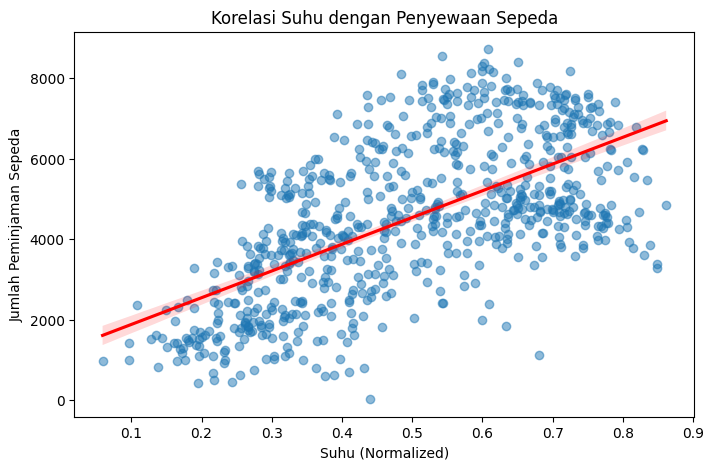

In [27]:
# Dampak perubahan suhu terhadap penyewaan sepeda
plt.figure(figsize=(8, 5))
sns.regplot(x="temp", y="cnt", data=day_df, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Korelasi Suhu dengan Penyewaan Sepeda")
plt.show()

**Insight:**
- Scatter plot menunjukkan bahwa semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda
- Pada suhu yang lebih rendah (sekitar 0.1 - 0.3), jumlah penyewaan sepeda cenderung lebih rendah
- Pada saat suhu meningkat (sekitar 0.5 - 0.8), jumlah penyewaan meningkat secara signifikan

### Pertanyaan 6: Jam Sibuk dalam Penyewaan Sepeda

In [28]:
busy_hours = hour_df.groupby("hr")["cnt"].mean().reset_index()
print(busy_hours)

    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


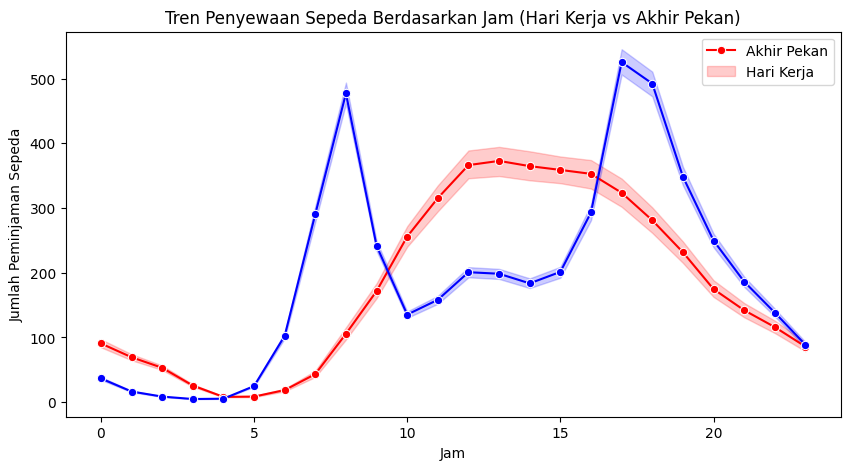

In [29]:
# Jam sibuk dalam penyewaan sepeda
plt.figure(figsize=(10, 5))
sns.lineplot(x="hr", y="cnt", hue="workingday", data=hour_df, marker="o", palette=["red", "blue"])
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Tren Penyewaan Sepeda Berdasarkan Jam (Hari Kerja vs Akhir Pekan)")
plt.legend(["Akhir Pekan", "Hari Kerja"])
plt.show()

**Insight:**
- Hari Kerja (Garis Biru) menunjukkan dua puncak utama. Pagi sekitar jam 8 (kemungkinan saat orang pergi bekerja/sekolah). Sore sekitar jam 17-18 (kemungkinan saat pulang kerja/sekolah).
- Pada jam 7-9 pagi dan 17-19 sore, penyewaan sepeda jauh lebih tinggi pada hari kerja dibanding akhir pekan
- Pada akhir pekan, tidak ada lonjakan besar, tetapi tren penyewaan naik mulai jam 9 pagi hingga sore dan stabil hingga malam

### Pertanyaan 7 : Pengaruh Cuaca terhadap Penyewaan Sepeda

In [30]:
weather_impact = day_df.groupby("weathersit")["cnt"].mean().reset_index()
weather_impact["weathersit"] = weather_impact["weathersit"].replace({1: "Clear", 2: "Mist/Cloudy", 3: "Light Snow/Rain", 4: "Heavy Rain/Snow"})
print(weather_impact)

        weathersit          cnt
0            Clear  4876.786177
1      Mist/Cloudy  4035.862348
2  Light Snow/Rain  1803.285714


C:\Users\Agum Medisa\AppData\Local\Temp\ipykernel_8152\143809133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=day_df, palette="coolwarm")


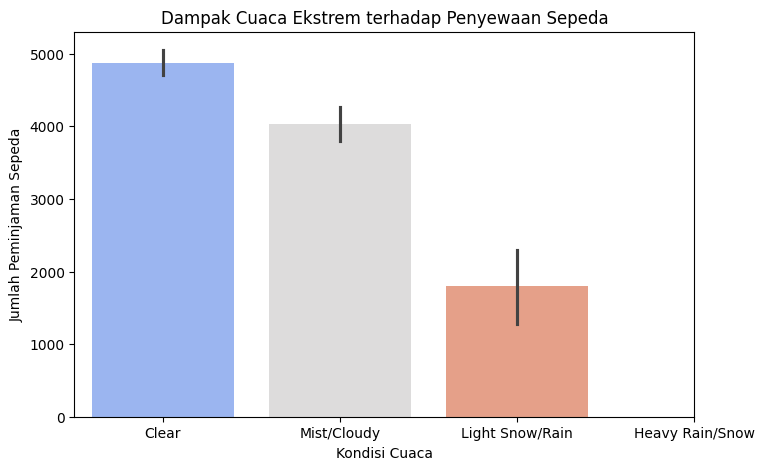

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(x="weathersit", y="cnt", data=day_df, palette="coolwarm")
plt.xticks([0, 1, 2, 3], ["Clear", "Mist/Cloudy", "Light Snow/Rain", "Heavy Rain/Snow"])
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Dampak Cuaca Ekstrem terhadap Penyewaan Sepeda")
plt.show()

## Analisis Lanjutan Menggunakan Clustering pada hour.csv

  Kategori Waktu Kategori Penyewaan Kategori Durasi  Jumlah Data
0      Dini Hari             Rendah  Durasi Panjang           34
1      Dini Hari             Rendah   Durasi Pendek         2675
2      Dini Hari             Rendah   Durasi Sedang          442
3      Dini Hari             Sedang   Durasi Pendek         1055
4      Dini Hari             Sedang   Durasi Sedang           58
5      Dini Hari             Tinggi   Durasi Pendek           23
6          Malam             Rendah   Durasi Pendek          226
7          Malam             Rendah   Durasi Sedang           12
8          Malam             Sedang   Durasi Pendek         1538
9          Malam             Sedang   Durasi Sedang           55


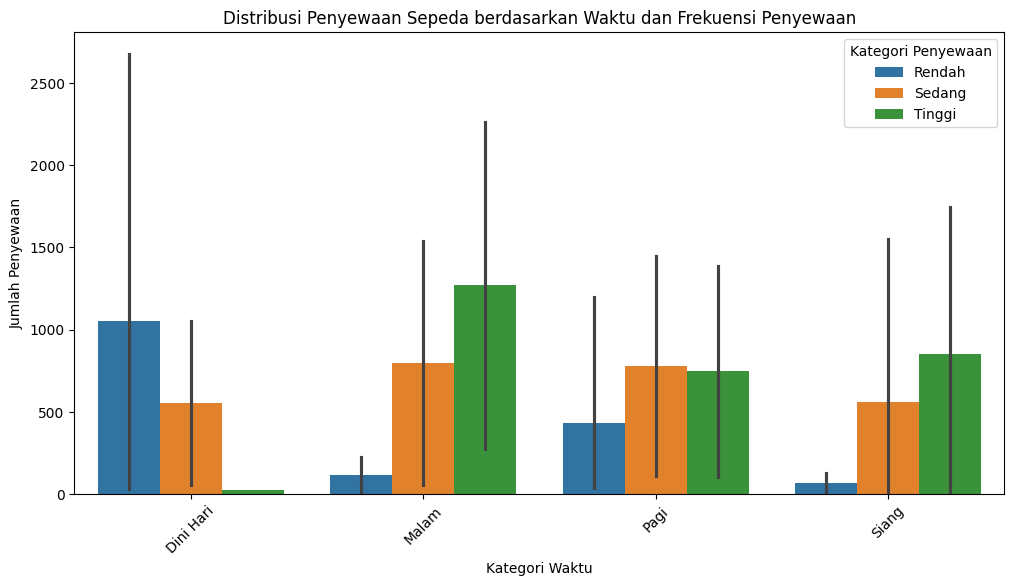

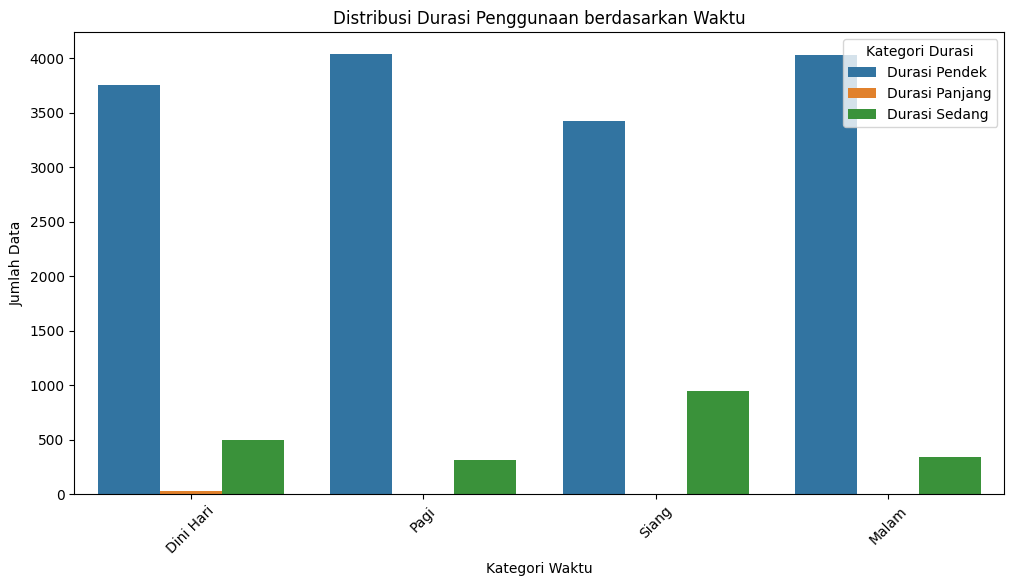

In [54]:
# Fungsi pengelompokan berdasarkan waktu penggunaan
def categorize_time(hour):
    if 5 <= hour < 11:
        return "Pagi"
    elif 11 <= hour < 17:
        return "Siang"
    elif 17 <= hour < 23:
        return "Malam"
    else:
        return "Dini Hari"

# Fungsi pengelompokan berdasarkan jumlah penyewaan
def categorize_usage(count):
    if count < 50:
        return "Rendah"
    elif 50 <= count < 200:
        return "Sedang"
    else:
        return "Tinggi"

# Fungsi pengelompokan berdasarkan estimasi durasi penggunaan
def categorize_duration(casual, registered):
    ratio = casual / (registered + 1)  # Hindari pembagian dengan nol
    if ratio > 1.5:
        return "Durasi Panjang"
    elif 0.5 <= ratio <= 1.5:
        return "Durasi Sedang"
    else:
        return "Durasi Pendek"

# Menambahkan kategori ke dalam DataFrame
hour_df["Kategori Waktu"] = hour_df["hr"].apply(categorize_time)
hour_df["Kategori Penyewaan"] = hour_df["cnt"].apply(categorize_usage)
hour_df["Kategori Durasi"] = hour_df.apply(lambda x: categorize_duration(x["casual"], x["registered"]), axis=1)

# Menampilkan ringkasan kelompok
grouped_df = hour_df.groupby(["Kategori Waktu", "Kategori Penyewaan", "Kategori Durasi"]).size().reset_index(name="Jumlah Data")

# Menampilkan hasil kelompok
print(grouped_df.head(10))

# Visualisasi dengan seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x="Kategori Waktu", y="Jumlah Data", hue="Kategori Penyewaan")
plt.title("Distribusi Penyewaan Sepeda berdasarkan Waktu dan Frekuensi Penyewaan")
plt.xlabel("Kategori Waktu")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Kategori Penyewaan")
plt.xticks(rotation=45)
plt.show()

# Visualisasi durasi penggunaan berdasarkan kategori waktu
plt.figure(figsize=(12, 6))
sns.countplot(data=hour_df, x="Kategori Waktu", hue="Kategori Durasi")
plt.title("Distribusi Durasi Penggunaan berdasarkan Waktu")
plt.xlabel("Kategori Waktu")
plt.ylabel("Jumlah Data")
plt.legend(title="Kategori Durasi")
plt.xticks(rotation=45)
plt.show()



**Insight:**
- Pada kondisi cerah (Clear), jumlah peminjaman mencapai lebih dari 5000
- Pada saat berawan atau berkabut (Mist/Cloudy), jumlah penyewaan turun menjadi sekitar 4000
- Hujan dan Salju Ringan Signifikan Mengurangi Penyewaan
- Hujan/Snow Lebat Hampir Menghentikan Penyewaan

## Conclusion
#### Pertanyaan 1 : **Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?**

Kondisi cuaca memiliki dampak besar terhadap jumlah penyewaan sepeda. Cuaca cerah adalah waktu paling ideal bagi pengguna sepeda, dengan penyewaan tertinggi. Penggunaan menurun saat berkabut tetapi masih cukup tinggi, menunjukkan bahwa pengguna tidak terlalu terganggu oleh kabut.Penyewaan anjlok drastis saat hujan atau salju ringan, yang berarti pengguna lebih memilih moda transportasi lain saat kondisi ini terjadi.

**Strategi bisnis yang bisa dilakukan:**
- Menyediakan jas hujan atau perlindungan ekstra agar pengguna tetap bisa menyewa meskipun dalam kondisi kurang ideal.
- Promosi atau diskon saat cuaca buruk untuk meningkatkan minat pengguna.
#### Pertanyaan 2 : **Pada jam berapa dan hari apa permintaan sepeda paling tinggi dan rendah?**
Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, menunjukkan bahwa banyak pengguna yang memanfaatkan sepeda sebagai moda transportasi utama. Kamis dan Jumat adalah hari dengan penyewaan tertinggi, yang mungkin menunjukkan bahwa orang lebih aktif menjelang akhir pekan. Minggu memiliki penyewaan terendah, kemungkinan karena banyak orang menghabiskan waktu di rumah atau memilih moda transportasi lain untuk aktivitas akhir pekan. Terdapat dua puncak utama penyewaan sepeda, yaitu pukul 08:00 pagi dan pukul 17:00 sore, yang mencerminkan pola komuter kerja dan sekolah. Penyewaan sepeda sangat rendah pada dini hari (00:00 - 05:00), menunjukkan bahwa sepeda jarang digunakan untuk aktivitas larut malam. 

**Potensi strategi bisnis:**
- Menawarkan promo atau diskon di akhir pekan untuk meningkatkan minat pengguna
- Menyediakan layanan sewa jangka panjang atau langganan bagi pekerja yang menggunakan sepeda sebagai transportasi rutin.
- Menawarkan diskon atau promo pada siang hari (10:00 - 15:00) dan malam hari (19:00 ke atas) untuk mendorong lebih banyak penyewaan di luar jam sibuk.
- Mengkaji lebih lanjut mengapa penyewaan sepeda menurun drastis setelah pukul 19:00—apakah karena faktor keamanan, pencahayaan jalan, atau faktor lainnya?

### Pertanyaan 3 : **Bagaimana tren penyewaan sepeda berdasarkan musim?**
Musim Gugur (Fall) adalah puncak penyewaan sepeda, menunjukkan bahwa kondisi cuaca dan lingkungan pada musim ini lebih mendukung aktivitas bersepeda. Musim Panas (Summer) juga memiliki permintaan tinggi, mungkin karena liburan musim panas dan cuaca yang hangat. Musim Semi (Spring) memiliki jumlah penyewaan terendah, mungkin karena cuaca yang tidak stabil atau musim hujan. Musim Dingin (Winter) memiliki permintaan cukup tinggi, yang bisa berasal dari pengguna reguler atau orang yang tetap menggunakan sepeda meskipun cuaca lebih dingin.

#### Pertanyaan 4: **Bagaimana pengaruh hari libur dan akhir pekan terhadap penyewaan sepeda?**
Penyewaan sepeda lebih banyak terjadi di hari kerja dibandingkan hari libur/akhir pekan. Sebagian besar pengguna kemungkinan menggunakan sepeda sebagai moda transportasi utama untuk aktivitas harian seperti bekerja atau sekolah. Akhir pekan lebih cenderung untuk penggunaan rekreasi, tetapi jumlahnya masih signifikan (~30%).

#### Pertanyaan 5: **Seberapa besar dampak perubahan suhu terhadap penyewaan sepeda?**
Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda → Semakin tinggi suhu, semakin banyak penyewaan sepeda. Suhu dingin dapat mengurangi minat pengguna untuk bersepeda, sedangkan suhu yang lebih hangat cenderung meningkatkan peminjaman. Cuaca kemungkinan menjadi faktor penting dalam tren penggunaan sepeda dan bisa dipertimbangkan dalam strategi bisnis.

**Rekomendasi Strategi:**
- Berikan promo khusus di musim dingin untuk menjaga minat pengguna.
- Bisa menyediakan fasilitas seperti sepeda dengan perlindungan lebih baik terhadap cuaca dingin.

#### Pertanyaan 6: **Apakah ada jam sibuk dalam penyewaan sepeda?**
Hari kerja memiliki dua puncak utama (pagi & sore) → Terkait dengan mobilitas kerja/sekolah. Akhir pekan menunjukkan penyebaran lebih merata → Lebih ke aktivitas santai & rekreasi. Jam 8 pagi dan jam 17-18 sore adalah waktu sibuk di hari kerja, sedangkan siang hingga sore hari lebih populer di akhir pekan.

**Rekomendasi Strategi**
- Pastikan sepeda tersedia lebih banyak di stasiun pada pagi dan sore hari untuk mengakomodasi lonjakan penyewaan.
- Meningkatkan promo atau paket langganan untuk mendorong lebih banyak penyewaan di siang dan sore hari akhir pekan.

#### Pertanyaan 7: **Bagaimana pengaruh cuaca ekstrem terhadap penyewaan sepeda?**
Cuaca cerah adalah kondisi terbaik untuk penyewaan sepeda. Berawan sedikit mengurangi jumlah peminjaman, tetapi tidak terlalu signifikan. Hujan dan salju ringan membuat penyewaan turun drastis, sedangkan kondisi ekstrem hampir menghentikan aktivitas bersepeda.

**Rekomendasi Strategi**
- Manfaatkan hari cerah untuk meningkatkan peminjaman dengan promo seperti diskon atau langganan bulanan.
- Menyediakan jas hujan atau aksesori tahan air untuk pengguna yang tetap ingin bersepeda.
- Informasikan perkiraan cuaca dalam aplikasi peminjaman sepeda untuk meningkatkan kesiapan pengguna.
- Memberikan opsi pengembalian fleksibel atau pembatalan tanpa biaya saat cuaca tiba-tiba berubah buruk.